In [95]:
from __future__ import division
from math import *
import numpy as np
import sys
import os
from matplotlib.ticker import LogFormatter
from matplotlib.ticker import LogFormatterExponent
from matplotlib.ticker import LogFormatterSciNotation

import pandas as pd
import numpy as np
import matplotlib, os
import matplotlib.pyplot as plt
# Matplotlib configuration
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.style.use('classic')
plt.rcParams['xtick.direction']     = 'in'
plt.rcParams['ytick.direction']     = 'in'
plt.rcParams['xtick.top']           = True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.right']         = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import matplotlib.cm as cm

from matplotlib import pyplot
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family' : "sans-serif"})
params= {'text.latex.preamble' : [r'\usepackage{amssymb}']}
pyplot.rcParams.update(params)

from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import FuncFormatter
from scipy.interpolate import griddata
from scipy.interpolate import interp1d

In [ ]:
exec(open("/Users/oozdal/packages/ExpDATA/ExDATA.py").read())

In [113]:
SeqSM_Zpxsec_LO = pd.read_csv('/Users/oozdal/projects/SSM_WpZp/data/SeqSM_Zpxsec_LO.csv', header=None, sep=" | ", engine='python')
SeqSM_Zpxsec_LO.columns = ["MZp", "xsec", "Zptotalwidth", "BRZptoee", "BRZptomumu", "BRZptoll", "upscale", "downscale", "upPDF", "downPDF", "MWp"]

LRSMZpxsec_LO = pd.read_csv('/Users/oozdal/projects/SSM_WpZp/data/LRSMZpxsec_LO.csv', header=None, sep=" | ", engine='python')
LRSMZpxsec_LO.columns = ["MZp", "xsec", "Zptotalwidth", "BRZptoee", "BRZptomumu", "BRZptoll", "upscale", "downscale", "upPDF", "downPDF", "MWp"]

AddSU2L_Zpxsec_LO = pd.read_csv('/Users/oozdal/projects/SSM_WpZp/data/AddSU2L_Zpxsec_LO.csv', header=None, sep=" | ", engine='python')
AddSU2L_Zpxsec_LO.columns = ["MZp", "xsec", "Zptotalwidth", "BRZptoee", "BRZptomumu", "BRZptoll", "upscale", "downscale", "upPDF", "downPDF", "MWp"]

BLSM_Zpxsec_LO = pd.read_csv('/Users/oozdal/projects/SSM_WpZp/data/BLSM_Zpxsec_LO.csv', header=None, sep=" | ",engine='python')
BLSM_Zpxsec_LO.columns = ["MZp", "xsec", "Zptotalwidth", "BRZptoee", "BRZptomumu", "BRZptoll", "upscale", "downscale", "upPDF", "downPDF"]

#BLSSM_Zpxsec_LO = pd.read_csv('/Users/oozdal/projects/SSM_WpZp/data/BLSSM_Zpxsec_LO.csv', header=None, sep=" | ",engine='python')
#BLSSM_Zpxsec_LO.columns = ["MZp", "xsec", "Zptotalwidth", "BRZptoee", "BRZptomumu", "BRZptoll", "upscale", "downscale", "upPDF", "downPDF"]

ALRSM_Zpxsec_LO = pd.read_csv('/Users/oozdal/projects/SSM_WpZp/data/ALRSM_Zpxsec_LO.csv', header=None, sep=" | ",engine='python')
ALRSM_Zpxsec_LO.columns = ["MZp", "xsec", "Zptotalwidth", "BRZptoee", "BRZptomumu", "BRZptoll", "upscale", "downscale", "upPDF", "downPDF", "MWp"]

Eta_LO = pd.read_csv('/Users/oozdal/projects/SSM_WpZp/data/eta.csv', header=0, sep=",",engine='python')
Eta_LO.columns = ['MZp','xsec','upscale','downscale','upPDF','downPDF','Zptotalwidth','BRZptoee','BRZptomumu']
Eta_LO["BRZptoll"] = Eta_LO["BRZptoee"]+Eta_LO["BRZptomumu"]

Psi_LO = pd.read_csv('/Users/oozdal/projects/SSM_WpZp/data/psi.csv', header=0, sep=",",engine='python')
Psi_LO.columns = ['MZp','xsec','upscale','downscale','upPDF','downPDF','Zptotalwidth','BRZptoee','BRZptomumu']
Psi_LO["BRZptoll"] = Psi_LO["BRZptoee"]+Psi_LO["BRZptomumu"]

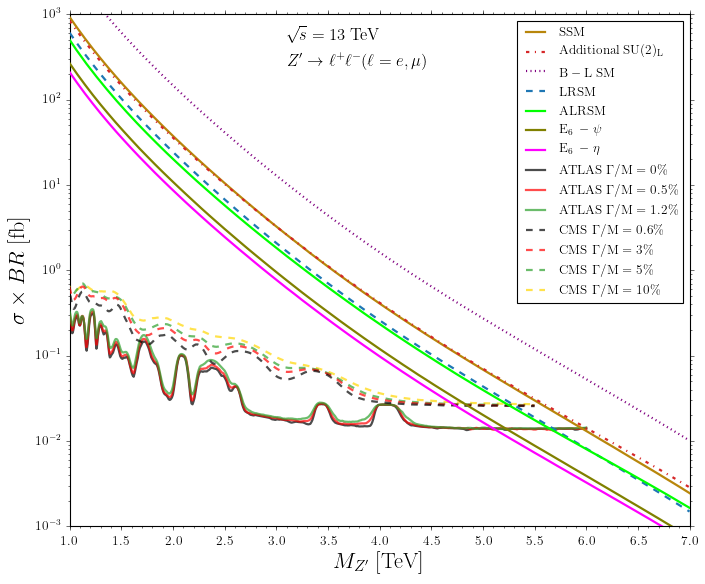

In [137]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
#cm = plt.cm.get_cmap('rainbow')
fig, ax1 = plt.subplots()
fig.set_facecolor('white')
#col = np.array(MG["width"])/np.array(MG["MZp"])

sc1 = ax1.plot(np.array(SeqSM_Zpxsec_LO["MZp"])/1000., np.array(SeqSM_Zpxsec_LO["xsec"]*1000*SeqSM_Zpxsec_LO["BRZptoll"]), c="darkgoldenrod", 
               zorder=50,label=r" $\rm {SSM} $ ", linewidth=2, linestyle='solid')

sc1 = ax1.plot(np.array(AddSU2L_Zpxsec_LO["MZp"])/1000., np.array(AddSU2L_Zpxsec_LO["xsec"]*1000*AddSU2L_Zpxsec_LO["BRZptoll"]), c="tab:red", 
               zorder=51,label=r" $\rm {Additional\ SU(2)_L} $ ",linewidth=2, linestyle='-.')

sc1 = ax1.plot(np.array(BLSM_Zpxsec_LO["MZp"])/1000., np.array(BLSM_Zpxsec_LO["xsec"]*1000*BLSM_Zpxsec_LO["BRZptoll"]), c="purple", 
               zorder=50,label=r" $\rm {B-L\ SM} $ ",linewidth=2, linestyle=":")

#sc1 = ax1.plot(np.array(BLSSM_Zpxsec_LO["MZp"])/1000., np.array(BLSSM_Zpxsec_LO["xsec"]*1000*BLSSM_Zpxsec_LO["BRZptoll"]), c="cyan", 
#               zorder=50,label=r" $\rm {B-L\ SSM} $ ",linewidth=1)


sc1 = ax1.plot(np.array(LRSMZpxsec_LO["MZp"])/1000., np.array(LRSMZpxsec_LO["xsec"]*1000*LRSMZpxsec_LO["BRZptoll"]), c="tab:blue", 
               zorder=50,label=r" $\rm {LRSM} $ ",linewidth=2, linestyle='dashed')

sc1 = ax1.plot(np.array(ALRSM_Zpxsec_LO["MZp"])/1000., np.array(ALRSM_Zpxsec_LO["xsec"]*1000*ALRSM_Zpxsec_LO["BRZptoll"]), c="lime", 
               zorder=50,label=r" $\rm {ALRSM} $ ",linewidth=2)

sc1 = ax1.plot(np.array(Psi_LO["MZp"])/1000., np.array(Psi_LO["xsec"]*1000*Psi_LO["BRZptoll"]), zorder=50, c="olive", label=r" $\rm {E_6\ - \psi} $ ", linewidth=2, linestyle='solid') 

sc1 = ax1.plot(np.array(Eta_LO["MZp"])/1000., np.array(Eta_LO["xsec"]*1000*Eta_LO["BRZptoll"]), zorder=50, c="magenta", label=r" $\rm {E_6\ - \eta} $ ", linewidth=2) 

#cbar1 = plt.colorbar(sc1, format = "%.0f", extend="both")
#cbar1.set_label(r"$\displaystyle v^\prime {\rm\ SU(2)_R\ and\ BL\ SSB\ scale\ [TeV]}$", fontsize=20)

sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width0/1000., observedxsection13TeVZpll139fb_xsec_width0,
               label=r"$ {\rm\ ATLAS\  \Gamma/M = 0 \%} $", color='black', linewidth=2.0, zorder=20,alpha=0.7, linestyle="solid")
sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width1over2/1000., observedxsection13TeVZpll139fb_xsec_width1over2,
               label=r"$ {\rm\ ATLAS\  \Gamma/M = 0.5 \%} $",color='red', linewidth=2.0, zorder=21,alpha=0.7, linestyle="solid")
sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width1point2/1000., observedxsection13TeVZpll139fb_xsec_width1point2,
               label=r"$ {\rm\ ATLAS\  \Gamma/M = 1.2 \%} $",color='tab:green', linewidth=2.0, zorder=22,alpha=0.7, linestyle="solid")


sc1 = ax1.plot((Zptoll_ObservedCMS_width06["MZp"])/1000., Zptoll_ObservedCMS_width06["xsec"],label=r"$ {\rm\ CMS\  \Gamma/M = 0.6 \%} $",color='black', 
               linewidth=2.0, zorder=35,alpha=0.7, linestyle="dashed")
sc1 = ax1.plot((Zptoll_ObservedCMS_width3["MZp"])/1000., Zptoll_ObservedCMS_width3["xsec"],label=r"$ {\rm\ CMS\  \Gamma/M = 3 \%} $",color='red', 
               linewidth=2.0, zorder=34,alpha=0.7, linestyle="dashed")
sc1 = ax1.plot((Zptoll_ObservedCMS_width5["MZp"])/1000., Zptoll_ObservedCMS_width5["xsec"],label=r"$ {\rm\ CMS\  \Gamma/M = 5 \%} $",color='tab:green', 
               linewidth=2.0, zorder=33,alpha=0.7, linestyle="dashed")
sc1 = ax1.plot((Zptoll_ObservedCMS_width10["MZp"])/1000., Zptoll_ObservedCMS_width10["xsec"],label=r"$ {\rm\ CMS\  \Gamma/M = 10 \%} $",color='gold', 
               linewidth=2.0, zorder=32,alpha=0.7, linestyle="dashed")


ax1.text(3.10, 5e2, r"$\displaystyle \sqrt{s} = 13 {\rm\ TeV}$", size=15)
ax1.text(3.10, 2.5e2, r"$\displaystyle Z^\prime \to \ell^+ \ell^- (\ell = e, \mu) $", size=15)
xmin = 1.0
xmax = 7.0
ymin = 1e-3
ymax = 1e3
ax1.axis([xmin,xmax,ymin,ymax])
plt.xlabel(r"$\displaystyle M_{Z^\prime} {\rm\ [TeV]}$", fontsize=20)
plt.ylabel(r"$\displaystyle \sigma \times BR {\rm\ [fb]}$", fontsize=20)
ax1.xaxis.set_major_locator(MultipleLocator(0.5))
ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
#ax1.yaxis.set_major_locator(MultipleLocator(5))
#ax1.yaxis.set_minor_locator(MultipleLocator(1))
plt.yscale('log')
# Set both ticks to be outside
ax1.tick_params(which='both', direction='out')
#plt.legend(loc='best',frameon=True)
leg = plt.legend(loc='upper right',frameon=True, prop={'size': 12})
leg.set_zorder(100)
#fig.savefig("plot/Zptoll_limit_withBR_139fb.png",dpi = 300)   # save the figure to file
#plt.close(fig)

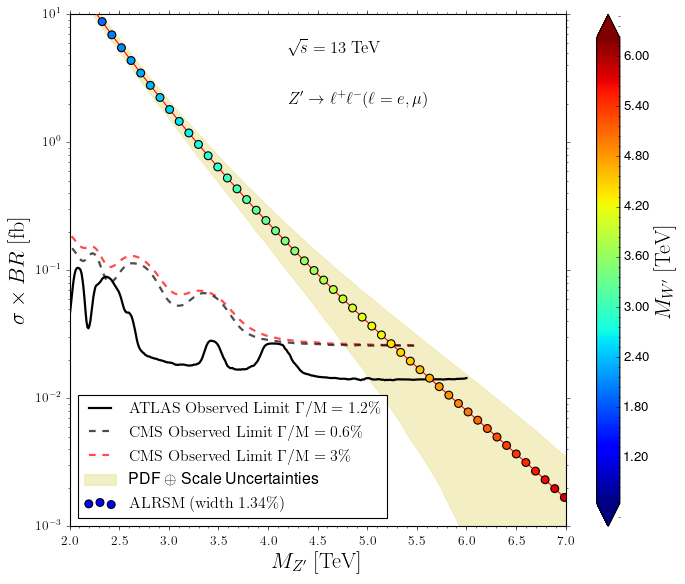

In [155]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)

cm = plt.cm.get_cmap('rainbow')
fig, ax1 = plt.subplots()
fig.set_facecolor('white')
col = np.array(ALRSM_Zpxsec_LO["MWp"])/1000.

sc1 = ax1.plot(np.array(ALRSM_Zpxsec_LO["MZp"])/1000., np.array(ALRSM_Zpxsec_LO["xsec"]*1000*ALRSM_Zpxsec_LO["BRZptoll"]), zorder=49, c="red")


totxsection = np.array(ALRSM_Zpxsec_LO["xsec"]*1000*ALRSM_Zpxsec_LO["BRZptoll"])
uperror     = np.sqrt(np.array(ALRSM_Zpxsec_LO["upscale"]**2+ALRSM_Zpxsec_LO["upPDF"]**2))/100.
uptotxsection = totxsection + totxsection*uperror
#sc1 = ax1.plot(np.array(ALRSM_Zpxsec_LO["MZp"])/1000., uptotxsection , zorder=49, c="red")

totxsection = np.array(ALRSM_Zpxsec_LO["xsec"]*1000*ALRSM_Zpxsec_LO["BRZptoll"])
downerror     = np.sqrt(np.array(ALRSM_Zpxsec_LO["downscale"]**2+ALRSM_Zpxsec_LO["downPDF"]**2))/100.
downtotxsection = totxsection - totxsection*uperror
#sc1 = ax1.plot(np.array(ALRSM_Zpxsec_LO["MZp"])/1000., downtotxsection , zorder=49, c="red")

sc1 = ax1.fill_between(np.array(ALRSM_Zpxsec_LO["MZp"])/1000., downtotxsection, uptotxsection, color='palegoldenrod', label=r"PDF $\oplus$ Scale Uncertainties", alpha=0.7)


sc1 = ax1.scatter(np.array(ALRSM_Zpxsec_LO["MZp"])/1000., np.array(ALRSM_Zpxsec_LO["xsec"]*1000*ALRSM_Zpxsec_LO["BRZptoll"]), 
                  c=col, marker=".", zorder=50,label=r" $\rm {ALRSM\ (width\ 1.34 \%)} $ ", s=200)


cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
cbar1.set_label(r"$\displaystyle M_{W^\prime} {\rm\ [TeV]}$", fontsize=20)

#sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width0/1000., observedxsection13TeVZpll139fb_xsec_width0,label=r"$ {\rm\ ATLAS\ Observed\ Limit\ \Gamma/M = 0} $",color='black', linewidth=2.0, zorder=30,alpha=0.7)
#sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width1over2/1000., observedxsection13TeVZpll139fb_xsec_width1over2,label=r"$ {\rm\ ATLAS\ Observed\ Limit\ \Gamma/M = 0.5 \%} $",color='blue', linewidth=2.0, zorder=20,alpha=0.7)
sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width1point2/1000., observedxsection13TeVZpll139fb_xsec_width1point2,label=r"$ {\rm\ ATLAS\ Observed\ Limit\ \Gamma/M = 1.2 \%} $",color='black', linewidth=2.0, zorder=10,alpha=1.0)
    

sc1 = ax1.plot((Zptoll_ObservedCMS_width06["MZp"])/1000., Zptoll_ObservedCMS_width06["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\ \Gamma/M = 0.6 \%} $",color='black', 
               linewidth=2.0, zorder=35,alpha=0.7, linestyle="dashed")
sc1 = ax1.plot((Zptoll_ObservedCMS_width3["MZp"])/1000., Zptoll_ObservedCMS_width3["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 3 \%} $",color='red', 
               linewidth=2.0, zorder=34,alpha=0.7, linestyle="dashed")
#sc1 = ax1.plot((Zptoll_ObservedCMS_width5["MZp"])/1000., Zptoll_ObservedCMS_width5["xsec"],label=r"$ {\rm\ CMS\  \Gamma/M = 5 \%} $",color='tab:green', 
#               linewidth=2.0, zorder=33,alpha=0.7)
#sc1 = ax1.plot((Zptoll_ObservedCMS_width10["MZp"])/1000., Zptoll_ObservedCMS_width10["xsec"],label=r"$ {\rm\ CMS\  \Gamma/M = 10 \%} $",color='gold', 
#               linewidth=2.0, zorder=32,alpha=0.7)
    
    
    
ax1.text(4.2, 5e0, r"$\displaystyle \sqrt{s} = 13 {\rm\ TeV}$", size=15)
ax1.text(4.2, 2e0, r"$\displaystyle Z^\prime \to \ell^+ \ell^- (\ell = e, \mu) $", size=15)
xmin = 2.0
xmax = 7.0
ymin = 1e-3
ymax = 1e1
ax1.axis([xmin,xmax,ymin,ymax])
plt.xlabel(r"$\displaystyle M_{Z^\prime} {\rm\ [TeV]}$", fontsize=20)
plt.ylabel(r"$\displaystyle \sigma \times BR {\rm\ [fb]}$", fontsize=20)
ax1.xaxis.set_major_locator(MultipleLocator(0.5))
ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
#ax1.yaxis.set_major_locator(MultipleLocator(5))
#ax1.yaxis.set_minor_locator(MultipleLocator(1))
plt.yscale('log')
# Set both ticks to be outside
ax1.tick_params(which='both', direction='out')
#plt.legend(loc='best',frameon=True)
leg = plt.legend(loc='lower left',frameon=True)
leg.set_zorder(100)
#fig.savefig("plot/Zptoll_limit_withBR_139fb.png",dpi = 300)   # save the figure to file
#plt.close(fig)

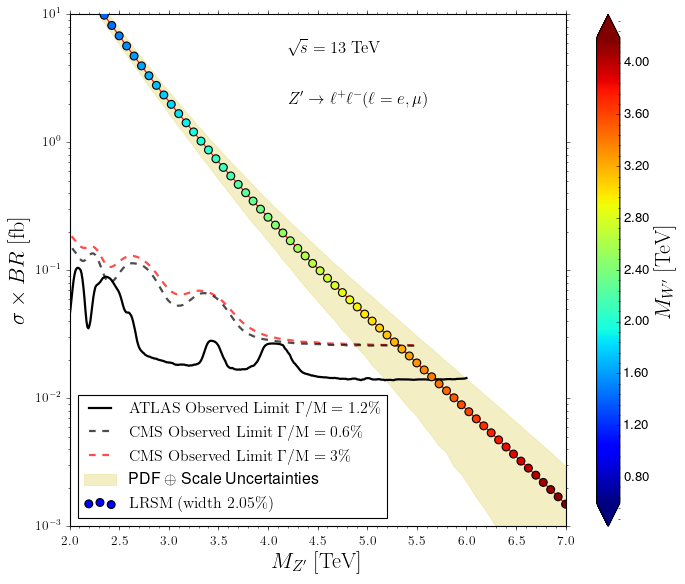

In [154]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)

cm = plt.cm.get_cmap('rainbow')
fig, ax1 = plt.subplots()
fig.set_facecolor('white')
col = (np.array(LRSMZpxsec_LO["MZp"])/1.67)/1000.

sc1 = ax1.plot(np.array(LRSMZpxsec_LO["MZp"])/1000., np.array(LRSMZpxsec_LO["xsec"]*1000*LRSMZpxsec_LO["BRZptoll"]), zorder=49, c="red")


totxsection = np.array(LRSMZpxsec_LO["xsec"]*1000*LRSMZpxsec_LO["BRZptoll"])
uperror     = np.sqrt(np.array(LRSMZpxsec_LO["upscale"]**2+LRSMZpxsec_LO["upPDF"]**2))/100.
uptotxsection = totxsection + totxsection*uperror
#sc1 = ax1.plot(np.array(LRSMZpxsec_LO["MZp"])/1000., uptotxsection , zorder=49, c="red")

totxsection = np.array(LRSMZpxsec_LO["xsec"]*1000*LRSMZpxsec_LO["BRZptoll"])
downerror     = np.sqrt(np.array(LRSMZpxsec_LO["downscale"]**2+LRSMZpxsec_LO["downPDF"]**2))/100.
downtotxsection = totxsection - totxsection*uperror
#sc1 = ax1.plot(np.array(LRSMZpxsec_LO["MZp"])/1000., downtotxsection , zorder=49, c="red")

sc1 = ax1.fill_between(np.array(LRSMZpxsec_LO["MZp"])/1000., downtotxsection, uptotxsection, color='palegoldenrod', label=r"PDF $\oplus$ Scale Uncertainties", alpha=0.7)


sc1 = ax1.scatter(np.array(LRSMZpxsec_LO["MZp"])/1000., np.array(LRSMZpxsec_LO["xsec"]*1000*LRSMZpxsec_LO["BRZptoll"]), 
                  c=col, marker=".", zorder=50,label=r" $\rm {LRSM\ (width\ 2.05 \%)} $ ", s=200)


cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
cbar1.set_label(r"$\displaystyle M_{W^\prime} {\rm\ [TeV]}$", fontsize=20)

#sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width0/1000., observedxsection13TeVZpll139fb_xsec_width0,label=r"$ {\rm\ ATLAS\ Observed\ Limit\ \Gamma/M = 0} $",color='black', linewidth=2.0, zorder=30,alpha=0.7)
#sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width1over2/1000., observedxsection13TeVZpll139fb_xsec_width1over2,label=r"$ {\rm\ ATLAS\ Observed\ Limit\ \Gamma/M = 0.5 \%} $",color='blue', linewidth=2.0, zorder=20,alpha=0.7)
sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width1point2/1000., observedxsection13TeVZpll139fb_xsec_width1point2,label=r"$ {\rm\ ATLAS\ Observed\ Limit\ \Gamma/M = 1.2 \%} $",color='black', linewidth=2.0, zorder=10,alpha=1.0)
   
sc1 = ax1.plot((Zptoll_ObservedCMS_width06["MZp"])/1000., Zptoll_ObservedCMS_width06["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 0.6 \%} $",color='black', 
               linewidth=2.0, zorder=35,alpha=0.7, linestyle="dashed")
sc1 = ax1.plot((Zptoll_ObservedCMS_width3["MZp"])/1000., Zptoll_ObservedCMS_width3["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 3 \%} $",color='red', 
               linewidth=2.0, zorder=34,alpha=0.7, linestyle="dashed")
#sc1 = ax1.plot((Zptoll_ObservedCMS_width5["MZp"])/1000., Zptoll_ObservedCMS_width5["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 5 \%} $",color='tab:green', 
#               linewidth=2.0, zorder=33,alpha=0.7, linestyle="dashed")
#sc1 = ax1.plot((Zptoll_ObservedCMS_width10["MZp"])/1000., Zptoll_ObservedCMS_width10["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 10 \%} $",color='gold', 
#               linewidth=2.0, zorder=32,alpha=0.7, linestyle="dashed")    
    
ax1.text(4.2, 5e0, r"$\displaystyle \sqrt{s} = 13 {\rm\ TeV}$", size=15)
ax1.text(4.2, 2e0, r"$\displaystyle Z^\prime \to \ell^+ \ell^- (\ell = e, \mu) $", size=15)
xmin = 2.0
xmax = 7.0
ymin = 1e-3
ymax = 1e1
ax1.axis([xmin,xmax,ymin,ymax])
plt.xlabel(r"$\displaystyle M_{Z^\prime} {\rm\ [TeV]}$", fontsize=20)
plt.ylabel(r"$\displaystyle \sigma \times BR {\rm\ [fb]}$", fontsize=20)
ax1.xaxis.set_major_locator(MultipleLocator(0.5))
ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
#ax1.yaxis.set_major_locator(MultipleLocator(5))
#ax1.yaxis.set_minor_locator(MultipleLocator(1))
plt.yscale('log')
# Set both ticks to be outside
ax1.tick_params(which='both', direction='out')
#plt.legend(loc='best',frameon=True)
leg = plt.legend(loc='lower left',frameon=True)
leg.set_zorder(100)
#fig.savefig("plot/Zptoll_limit_withBR_139fb.png",dpi = 300)   # save the figure to file
#plt.close(fig)

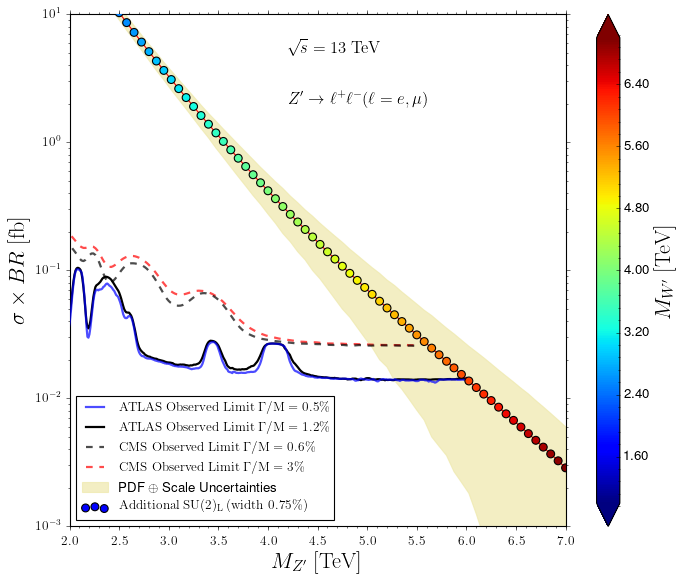

In [153]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)

cm = plt.cm.get_cmap('rainbow')
fig, ax1 = plt.subplots()
fig.set_facecolor('white')
col = (np.array(AddSU2L_Zpxsec_LO["MZp"]))/1000.   # Z'/W' ratio = 1

sc1 = ax1.plot(np.array(AddSU2L_Zpxsec_LO["MZp"])/1000., np.array(AddSU2L_Zpxsec_LO["xsec"]*1000*AddSU2L_Zpxsec_LO["BRZptoll"]), zorder=49, c="red")

totxsection = np.array(AddSU2L_Zpxsec_LO["xsec"]*1000*AddSU2L_Zpxsec_LO["BRZptoll"])
uperror     = np.sqrt(np.array(AddSU2L_Zpxsec_LO["upscale"]**2+AddSU2L_Zpxsec_LO["upPDF"]**2))/100.
uptotxsection = totxsection + totxsection*uperror
#sc1 = ax1.plot(np.array(AddSU2L_Zpxsec_LO["MZp"])/1000., uptotxsection , zorder=49, c="red")

totxsection = np.array(AddSU2L_Zpxsec_LO["xsec"]*1000*AddSU2L_Zpxsec_LO["BRZptoll"])
downerror     = np.sqrt(np.array(AddSU2L_Zpxsec_LO["downscale"]**2+AddSU2L_Zpxsec_LO["downPDF"]**2))/100.
downtotxsection = totxsection - totxsection*uperror
#sc1 = ax1.plot(np.array(AddSU2L_Zpxsec_LO["MZp"])/1000., downtotxsection , zorder=49, c="red")

sc1 = ax1.fill_between(np.array(AddSU2L_Zpxsec_LO["MZp"])/1000., downtotxsection, uptotxsection, color='palegoldenrod', label=r"PDF $\oplus$ Scale Uncertainties", alpha=0.7)

sc1 = ax1.scatter(np.array(AddSU2L_Zpxsec_LO["MZp"])/1000., np.array(AddSU2L_Zpxsec_LO["xsec"]*1000*AddSU2L_Zpxsec_LO["BRZptoll"]), 
                  c=col, marker=".", zorder=50,label=r" $\rm {Additional\ SU(2)_L\ (width\ 0.75 \%)} $", s=200)

cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
cbar1.set_label(r"$\displaystyle M_{W^\prime} {\rm\ [TeV]}$", fontsize=20)

#sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width0/1000., observedxsection13TeVZpll139fb_xsec_width0,label=r"$ {\rm\ ATLAS\ Observed\ Limit\ \Gamma/M = 0} $",color='black', linewidth=2.0, zorder=30,alpha=0.7)
sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width1over2/1000., observedxsection13TeVZpll139fb_xsec_width1over2,label=r"$ {\rm\ ATLAS\ Observed\ Limit\ \Gamma/M = 0.5 \%} $",color='blue', linewidth=2.0, zorder=20,alpha=0.7)
sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width1point2/1000., observedxsection13TeVZpll139fb_xsec_width1point2,label=r"$ {\rm\ ATLAS\ Observed\ Limit\ \Gamma/M = 1.2 \%} $",color='black', linewidth=2.0, zorder=10,alpha=1.0)
    
    
sc1 = ax1.plot((Zptoll_ObservedCMS_width06["MZp"])/1000., Zptoll_ObservedCMS_width06["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 0.6 \%} $",color='black', 
               linewidth=2.0, zorder=35,alpha=0.7, linestyle="dashed")
sc1 = ax1.plot((Zptoll_ObservedCMS_width3["MZp"])/1000., Zptoll_ObservedCMS_width3["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 3 \%} $",color='red', 
               linewidth=2.0, zorder=34,alpha=0.7, linestyle="dashed")
#sc1 = ax1.plot((Zptoll_ObservedCMS_width5["MZp"])/1000., Zptoll_ObservedCMS_width5["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 5 \%} $",color='tab:green', 
#               linewidth=2.0, zorder=33,alpha=0.7, linestyle="dashed")
#sc1 = ax1.plot((Zptoll_ObservedCMS_width10["MZp"])/1000., Zptoll_ObservedCMS_width10["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 10 \%} $",color='gold', 
#               linewidth=2.0, zorder=32,alpha=0.7, linestyle="dashed")        
    
ax1.text(4.2, 5e0, r"$\displaystyle \sqrt{s} = 13 {\rm\ TeV}$", size=15)
ax1.text(4.2, 2e0, r"$\displaystyle Z^\prime \to \ell^+ \ell^- (\ell = e, \mu) $", size=15)
xmin = 2.0
xmax = 7.0
ymin = 1e-3
ymax = 1e1
ax1.axis([xmin,xmax,ymin,ymax])
plt.xlabel(r"$\displaystyle M_{Z^\prime} {\rm\ [TeV]}$", fontsize=20)
plt.ylabel(r"$\displaystyle \sigma \times BR {\rm\ [fb]}$", fontsize=20)
ax1.xaxis.set_major_locator(MultipleLocator(0.5))
ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
#ax1.yaxis.set_major_locator(MultipleLocator(5))
#ax1.yaxis.set_minor_locator(MultipleLocator(1))
plt.yscale('log')
# Set both ticks to be outside
ax1.tick_params(which='both', direction='out')
#plt.legend(loc='best',frameon=True)
leg = plt.legend(loc='lower left',frameon=True, prop={'size': 12})
leg.set_zorder(100)
#fig.savefig("plot/Zptoll_limit_withBR_139fb.png",dpi = 300)   # save the figure to file
#plt.close(fig)

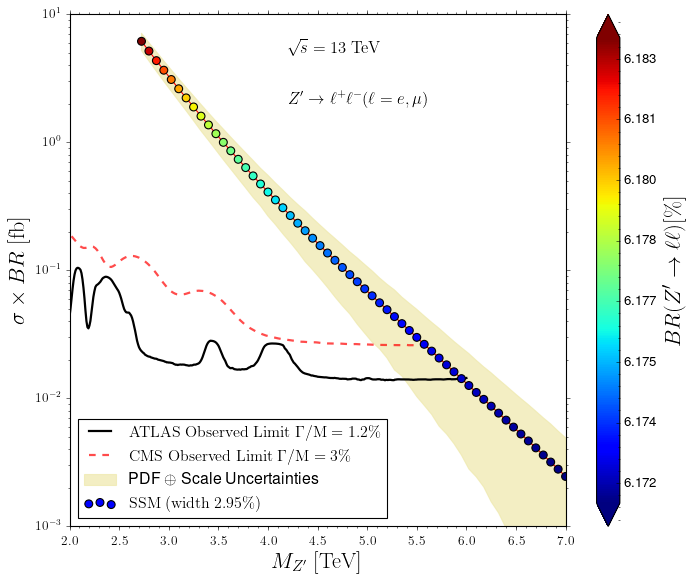

In [152]:
SeqSM_Zpxsec_LO = SeqSM_Zpxsec_LO[ SeqSM_Zpxsec_LO["xsec"] < 1e-1 ]

pyplot.rcParams['figure.figsize'] = (10.0, 8.0)

cm = plt.cm.get_cmap('rainbow_r')
fig, ax1 = plt.subplots()
fig.set_facecolor('white')
col = np.array(SeqSM_Zpxsec_LO["BRZptoll"])*100

sc1 = ax1.plot(np.array(SeqSM_Zpxsec_LO["MZp"])/1000., np.array(SeqSM_Zpxsec_LO["xsec"]*1000*SeqSM_Zpxsec_LO["BRZptoll"]), zorder=49, c="red")

totxsection = np.array(SeqSM_Zpxsec_LO["xsec"]*1000*SeqSM_Zpxsec_LO["BRZptoll"])
uperror     = np.sqrt(np.array(SeqSM_Zpxsec_LO["upscale"]**2+SeqSM_Zpxsec_LO["upPDF"]**2))/100.
uptotxsection = totxsection + totxsection*uperror
#sc1 = ax1.plot(np.array(SeqSM_Zpxsec_LO["MZp"])/1000., uptotxsection , zorder=49, c="red")

totxsection = np.array(SeqSM_Zpxsec_LO["xsec"]*1000*SeqSM_Zpxsec_LO["BRZptoll"])
downerror     = np.sqrt(np.array(SeqSM_Zpxsec_LO["downscale"]**2+SeqSM_Zpxsec_LO["downPDF"]**2))/100.
downtotxsection = totxsection - totxsection*uperror
#sc1 = ax1.plot(np.array(SeqSM_Zpxsec_LO["MZp"])/1000., downtotxsection , zorder=49, c="red")

sc1 = ax1.fill_between(np.array(SeqSM_Zpxsec_LO["MZp"])/1000., downtotxsection, uptotxsection, color='palegoldenrod', label=r"PDF $\oplus$ Scale Uncertainties", alpha=0.7)

sc1 = ax1.scatter(np.array(SeqSM_Zpxsec_LO["MZp"])/1000., np.array(SeqSM_Zpxsec_LO["xsec"]*1000*SeqSM_Zpxsec_LO["BRZptoll"]), 
                  c=col, marker=".", zorder=50,label=r" $\rm {SSM\ (width\ 2.95 \%)} $ ", s=200)

cbar1 = plt.colorbar(sc1, format = "%.3f", extend="both")
cbar1.set_label(r"$\displaystyle BR(Z^\prime \to \ell \ell) [\%] $ ", fontsize=20)

#sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width0/1000., observedxsection13TeVZpll139fb_xsec_width0,label=r"$ {\rm\ ATLAS\ Observed\ Limit\ \Gamma/M = 0} $",color='black', linewidth=2.0, zorder=30,alpha=0.7)
#sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width1over2/1000., observedxsection13TeVZpll139fb_xsec_width1over2,label=r"$ {\rm\ ATLAS\ Observed\ Limit\ \Gamma/M = 0.5 \%} $",color='blue', linewidth=2.0, zorder=20,alpha=0.7)
sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width1point2/1000., observedxsection13TeVZpll139fb_xsec_width1point2,label=r"$ {\rm\ ATLAS\ Observed\ Limit\ \Gamma/M = 1.2 \%} $",color='black', linewidth=2.0, zorder=10,alpha=1.0)
    
    
    
#sc1 = ax1.plot((Zptoll_ObservedCMS_width06["MZp"])/1000., Zptoll_ObservedCMS_width06["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 0.6 \%} $",color='black', 
#               linewidth=2.0, zorder=35,alpha=0.7, linestyle="dashed")
sc1 = ax1.plot((Zptoll_ObservedCMS_width3["MZp"])/1000., Zptoll_ObservedCMS_width3["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 3 \%} $",color='red', 
               linewidth=2.0, zorder=34,alpha=0.7, linestyle="dashed")
#sc1 = ax1.plot((Zptoll_ObservedCMS_width5["MZp"])/1000., Zptoll_ObservedCMS_width5["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 5 \%} $",color='tab:green', 
#               linewidth=2.0, zorder=33,alpha=0.7, linestyle="dashed")
#sc1 = ax1.plot((Zptoll_ObservedCMS_width10["MZp"])/1000., Zptoll_ObservedCMS_width10["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 10 \%} $",color='gold', 
#               linewidth=2.0, zorder=32,alpha=0.7, linestyle="dashed")      
    
    
    
ax1.text(4.2, 5e0, r"$\displaystyle \sqrt{s} = 13 {\rm\ TeV}$", size=15)
ax1.text(4.2, 2e0, r"$\displaystyle Z^\prime \to \ell^+ \ell^- (\ell = e, \mu) $ ", size=15)
xmin = 2.0
xmax = 7.0
ymin = 1e-3
ymax = 1e1
ax1.axis([xmin,xmax,ymin,ymax])
plt.xlabel(r"$\displaystyle M_{Z^\prime} {\rm\ [TeV]}$", fontsize=20)
plt.ylabel(r"$\displaystyle \sigma \times BR {\rm\ [fb]}$", fontsize=20)
ax1.xaxis.set_major_locator(MultipleLocator(0.5))
ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
#ax1.yaxis.set_major_locator(MultipleLocator(5))
#ax1.yaxis.set_minor_locator(MultipleLocator(1))
plt.yscale('log')
# Set both ticks to be outside
ax1.tick_params(which='both', direction='out')
#plt.legend(loc='best',frameon=True)
leg = plt.legend(loc='lower left',frameon=True)
leg.set_zorder(100)
#fig.savefig("plot/Zptoll_limit_withBR_139fb.png",dpi = 300)   # save the figure to file
#plt.close(fig)

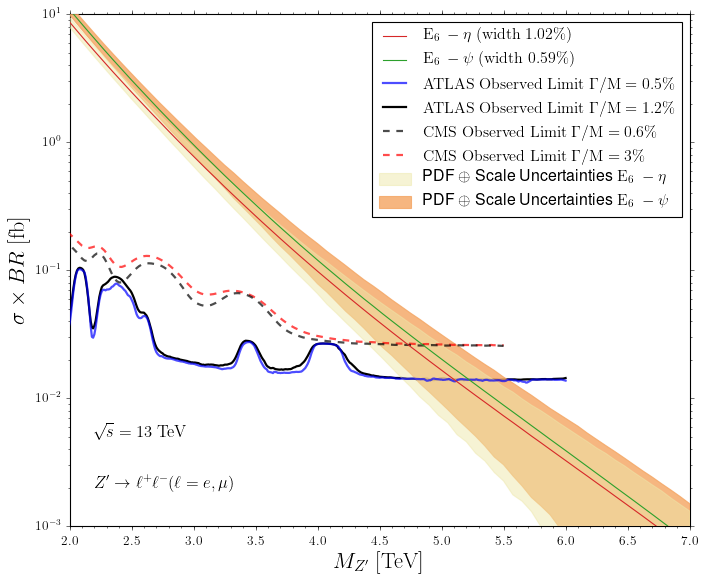

In [148]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)

#cm = plt.cm.get_cmap('rainbow_r')
fig, ax1 = plt.subplots()
fig.set_facecolor('white')
#col = np.array(Eta_LO["BRZptoll"])*100


############################## E6 Eta Model ##############################
Eta_LO["BRZptoll"] = Eta_LO["BRZptoee"]+Eta_LO["BRZptomumu"]

sc1 = ax1.plot(np.array(Eta_LO["MZp"])/1000., np.array(Eta_LO["xsec"]*1000*Eta_LO["BRZptoll"]), zorder=49, c="tab:red", label=r" $\rm {E_6\ - \eta\ (width\ 1.02 \%)} $ ") 

totxsection = np.array(Eta_LO["xsec"]*1000*Eta_LO["BRZptoll"])
uperror     = np.sqrt(np.array(Eta_LO["upscale"]**2+Eta_LO["upPDF"]**2))
uptotxsection = totxsection + totxsection*uperror
#sc1 = ax1.plot(np.array(SeqSM_Zpxsec_LO["MZp"])/1000., uptotxsection , zorder=49, c="red")

totxsection = np.array(Eta_LO["xsec"]*1000*Eta_LO["BRZptoll"])
downerror     = np.sqrt(np.array(Eta_LO["downscale"]**2+Eta_LO["downPDF"]**2))
downtotxsection = totxsection - totxsection*uperror
#sc1 = ax1.plot(np.array(Eta_LO["MZp"])/1000., downtotxsection , zorder=49, c="red")

sc1 = ax1.fill_between(np.array(Eta_LO["MZp"])/1000., downtotxsection, uptotxsection, color='palegoldenrod',
                       label=r"PDF $\oplus$ Scale Uncertainties $\rm {E_6\ - \eta} $ ", alpha=0.5,zorder=19)

#sc1 = ax1.scatter(np.array(Eta_LO["MZp"])/1000., np.array(Eta_LO["xsec"]*1000*Eta_LO["BRZptoll"]), 
#                  c="tab:green", marker=".", zorder=50,label=r" $\rm {Eta} $ ", s=200)

#cbar1 = plt.colorbar(sc1, format = "%.3f", extend="both")
#cbar1.set_label(r"$\displaystyle BR(Z^\prime \to \ell \ell) [\%] $ ", fontsize=20)

############################## E6 Psi Model ##############################

Psi_LO["BRZptoll"] = Psi_LO["BRZptoee"]+Psi_LO["BRZptomumu"]

sc1 = ax1.plot(np.array(Psi_LO["MZp"])/1000., np.array(Psi_LO["xsec"]*1000*Psi_LO["BRZptoll"]), zorder=49, c="tab:green", label=r" $\rm {E_6\ - \psi\ (width\ 0.59 \%)} $ ") 

totxsection = np.array(Psi_LO["xsec"]*1000*Psi_LO["BRZptoll"])
uperror     = np.sqrt(np.array(Psi_LO["upscale"]**2+Psi_LO["upPDF"]**2))
uptotxsection = totxsection + totxsection*uperror
#sc1 = ax1.plot(np.array(SeqSM_Zpxsec_LO["MZp"])/1000., uptotxsection , zorder=49, c="red")

totxsection = np.array(Psi_LO["xsec"]*1000*Psi_LO["BRZptoll"])
downerror     = np.sqrt(np.array(Psi_LO["downscale"]**2+Psi_LO["downPDF"]**2))
downtotxsection = totxsection - totxsection*uperror
#sc1 = ax1.plot(np.array(Eta_LO["MZp"])/1000., downtotxsection , zorder=49, c="red")

sc1 = ax1.fill_between(np.array(Psi_LO["MZp"])/1000., downtotxsection, uptotxsection, color='sandybrown',
                       label=r"PDF $\oplus$ Scale Uncertainties $\rm {E_6\ - \psi} $", alpha=0.8, zorder=18)

#sc1 = ax1.scatter(np.array(Psi_LO["MZp"])/1000., np.array(Psi_LO["xsec"]*1000*Psi_LO["BRZptoll"]), 
#                  c="tab:green", marker=".", zorder=50,label=r" $\rm {Eta} $ ", s=200)

#cbar1 = plt.colorbar(sc1, format = "%.3f", extend="both")
#cbar1.set_label(r"$\displaystyle BR(Z^\prime \to \ell \ell) [\%] $ ", fontsize=20)


#sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width0/1000., observedxsection13TeVZpll139fb_xsec_width0,label=r"$ {\rm\ ATLAS\ Observed\ Limit\ \Gamma/M = 0} $",color='black', linewidth=2.0, zorder=30,alpha=0.7)
sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width1over2/1000., observedxsection13TeVZpll139fb_xsec_width1over2,label=r"$ {\rm\ ATLAS\ Observed\ Limit\ \Gamma/M = 0.5 \%} $",color='blue', linewidth=2.0, zorder=20,alpha=0.7)
sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width1point2/1000., observedxsection13TeVZpll139fb_xsec_width1point2,label=r"$ {\rm\ ATLAS\ Observed\ Limit\ \Gamma/M = 1.2 \%} $",color='black', linewidth=2.0, zorder=10,alpha=1.0)
    

sc1 = ax1.plot((Zptoll_ObservedCMS_width06["MZp"])/1000., Zptoll_ObservedCMS_width06["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 0.6 \%} $",color='black', 
               linewidth=2.0, zorder=35,alpha=0.7, linestyle="dashed")
sc1 = ax1.plot((Zptoll_ObservedCMS_width3["MZp"])/1000., Zptoll_ObservedCMS_width3["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 3 \%} $",color='red', 
               linewidth=2.0, zorder=34,alpha=0.7, linestyle="dashed")
#sc1 = ax1.plot((Zptoll_ObservedCMS_width5["MZp"])/1000., Zptoll_ObservedCMS_width5["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 5 \%} $",color='tab:green', 
#               linewidth=2.0, zorder=33,alpha=0.7, linestyle="dashed")
#sc1 = ax1.plot((Zptoll_ObservedCMS_width10["MZp"])/1000., Zptoll_ObservedCMS_width10["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 10 \%} $",color='gold', 
#               linewidth=2.0, zorder=32,alpha=0.7, linestyle="dashed")      
    
    
ax1.text(2.2, 5e-3, r"$\displaystyle \sqrt{s} = 13 {\rm\ TeV}$", size=15)
ax1.text(2.2, 2e-3, r"$\displaystyle Z^\prime \to \ell^+ \ell^- (\ell = e, \mu) $ ", size=15)
xmin = 2.0
xmax = 7.0
ymin = 1e-3
ymax = 1e1
ax1.axis([xmin,xmax,ymin,ymax])
plt.xlabel(r"$\displaystyle M_{Z^\prime} {\rm\ [TeV]}$", fontsize=20)
plt.ylabel(r"$\displaystyle \sigma \times BR {\rm\ [fb]}$", fontsize=20)
ax1.xaxis.set_major_locator(MultipleLocator(0.5))
ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
#ax1.yaxis.set_major_locator(MultipleLocator(5))
#ax1.yaxis.set_minor_locator(MultipleLocator(1))
plt.yscale('log')
# Set both ticks to be outside
ax1.tick_params(which='both', direction='out')
#plt.legend(loc='best',frameon=True)
leg = plt.legend(loc='upper right',frameon=True)
leg.set_zorder(100)
#fig.savefig("plot/Zptoll_limit_withBR_139fb.png",dpi = 300)   # save the figure to file
#plt.close(fig)

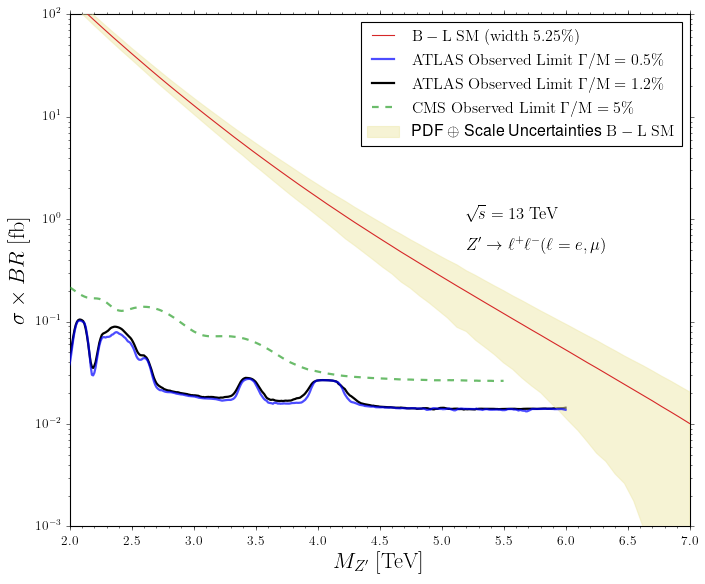

In [151]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)

#cm = plt.cm.get_cmap('rainbow_r')
fig, ax1 = plt.subplots()
fig.set_facecolor('white')
#col = np.array(BLSM_Zpxsec_LO["BRZptoll"])*100


############################## B-L Model ##############################

sc1 = ax1.plot(np.array(BLSM_Zpxsec_LO["MZp"])/1000., np.array(BLSM_Zpxsec_LO["xsec"]*1000*BLSM_Zpxsec_LO["BRZptoll"]), zorder=49, c="tab:red", label=r" $\rm {B-L\ SM\ (width\ 5.25 \%)} $") 

totxsection = np.array(BLSM_Zpxsec_LO["xsec"]*1000*BLSM_Zpxsec_LO["BRZptoll"])
uperror     = np.sqrt(np.array(BLSM_Zpxsec_LO["upscale"]**2+BLSM_Zpxsec_LO["upPDF"]**2))/100.
uptotxsection = totxsection + totxsection*uperror
#sc1 = ax1.plot(np.array(BLSM_Zpxsec_LO["MZp"])/1000., uptotxsection , zorder=49, c="red")

totxsection = np.array(BLSM_Zpxsec_LO["xsec"]*1000*BLSM_Zpxsec_LO["BRZptoll"])
downerror     = np.sqrt(np.array(BLSM_Zpxsec_LO["downscale"]**2+BLSM_Zpxsec_LO["downPDF"]**2))/100.
downtotxsection = totxsection - totxsection*uperror
#sc1 = ax1.plot(np.array(BLSM_Zpxsec_LO["MZp"])/1000., downtotxsection , zorder=49, c="red")

sc1 = ax1.fill_between(np.array(BLSM_Zpxsec_LO["MZp"])/1000., downtotxsection, uptotxsection, color='palegoldenrod',
                       label=r"PDF $\oplus$ Scale Uncertainties $\rm {B-L\ SM} $", alpha=0.5,zorder=19)

#sc1 = ax1.scatter(np.array(BLSM_Zpxsec_LO["MZp"])/1000., np.array(BLSM_Zpxsec_LO["xsec"]*1000*BLSM_Zpxsec_LO["BRZptoll"]), 
#                  c="tab:green", marker=".", zorder=50,label=r" $\rm {Eta} $ ", s=200)

#cbar1 = plt.colorbar(sc1, format = "%.3f", extend="both")
#cbar1.set_label(r"$\displaystyle BR(Z^\prime \to \ell \ell) [\%] $ ", fontsize=20)

############################## E6 Psi Model ##############################

##Psi_LO["BRZptoll"] = Psi_LO["BRZptoee"]+Psi_LO["BRZptomumu"]

##sc1 = ax1.plot(np.array(Psi_LO["MZp"])/1000., np.array(Psi_LO["xsec"]*1000*Psi_LO["BRZptoll"]), zorder=49, c="tab:green", label=r" $\rm {E_6\ - \psi} $ ") 

##totxsection = np.array(Psi_LO["xsec"]*1000*Psi_LO["BRZptoll"])
##uperror     = np.sqrt(np.array(Psi_LO["upscale"]**2+Psi_LO["upPDF"]**2))
##uptotxsection = totxsection + totxsection*uperror
#sc1 = ax1.plot(np.array(SeqSM_Zpxsec_LO["MZp"])/1000., uptotxsection , zorder=49, c="red")

##totxsection = np.array(Psi_LO["xsec"]*1000*Psi_LO["BRZptoll"])
##downerror     = np.sqrt(np.array(Psi_LO["downscale"]**2+Psi_LO["downPDF"]**2))
##downtotxsection = totxsection - totxsection*uperror
#sc1 = ax1.plot(np.array(Eta_LO["MZp"])/1000., downtotxsection , zorder=49, c="red")

##sc1 = ax1.fill_between(np.array(Psi_LO["MZp"])/1000., downtotxsection, uptotxsection, color='sandybrown',
##                       label=r"PDF $\oplus$ Scale Uncertainties $\rm {E_6\ - \psi} $", alpha=0.8, zorder=18)

#sc1 = ax1.scatter(np.array(Psi_LO["MZp"])/1000., np.array(Psi_LO["xsec"]*1000*Psi_LO["BRZptoll"]), 
#                  c="tab:green", marker=".", zorder=50,label=r" $\rm {Eta} $ ", s=200)

#cbar1 = plt.colorbar(sc1, format = "%.3f", extend="both")
#cbar1.set_label(r"$\displaystyle BR(Z^\prime \to \ell \ell) [\%] $ ", fontsize=20)
#############################################################################

#sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width0/1000., observedxsection13TeVZpll139fb_xsec_width0,label=r"$ {\rm\ ATLAS\ Observed\ Limit\ \Gamma/M = 0} $",color='black', linewidth=2.0, zorder=30,alpha=0.7)
sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width1over2/1000., observedxsection13TeVZpll139fb_xsec_width1over2,label=r"$ {\rm\ ATLAS\ Observed\ Limit\ \Gamma/M = 0.5 \%} $",color='blue', linewidth=2.0, zorder=20,alpha=0.7)
sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width1point2/1000., observedxsection13TeVZpll139fb_xsec_width1point2,label=r"$ {\rm\ ATLAS\ Observed\ Limit\ \Gamma/M = 1.2 \%} $",color='black', linewidth=2.0, zorder=10,alpha=1.0)
   
    
#sc1 = ax1.plot((Zptoll_ObservedCMS_width06["MZp"])/1000., Zptoll_ObservedCMS_width06["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 0.6 \%} $",color='black', 
#               linewidth=2.0, zorder=35,alpha=0.7, linestyle="dashed")
#sc1 = ax1.plot((Zptoll_ObservedCMS_width3["MZp"])/1000., Zptoll_ObservedCMS_width3["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 3 \%} $",color='red', 
#               linewidth=2.0, zorder=34,alpha=0.7, linestyle="dashed")
sc1 = ax1.plot((Zptoll_ObservedCMS_width5["MZp"])/1000., Zptoll_ObservedCMS_width5["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 5 \%} $",color='tab:green', 
               linewidth=2.0, zorder=33,alpha=0.7, linestyle="dashed")
#sc1 = ax1.plot((Zptoll_ObservedCMS_width10["MZp"])/1000., Zptoll_ObservedCMS_width10["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 10 \%} $",color='gold', 
#               linewidth=2.0, zorder=32,alpha=0.7, linestyle="dashed")      
    
ax1.text(5.2, 1e0, r"$\displaystyle \sqrt{s} = 13 {\rm\ TeV}$", size=15)
ax1.text(5.2, 5e-1, r"$\displaystyle Z^\prime \to \ell^+ \ell^- (\ell = e, \mu) $ ", size=15)
xmin = 2.0
xmax = 7.0
ymin = 1e-3
ymax = 1e2
ax1.axis([xmin,xmax,ymin,ymax])
plt.xlabel(r"$\displaystyle M_{Z^\prime} {\rm\ [TeV]}$", fontsize=20)
plt.ylabel(r"$\displaystyle \sigma \times BR {\rm\ [fb]}$", fontsize=20)
ax1.xaxis.set_major_locator(MultipleLocator(0.5))
ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
#ax1.yaxis.set_major_locator(MultipleLocator(5))
#ax1.yaxis.set_minor_locator(MultipleLocator(1))
plt.yscale('log')
# Set both ticks to be outside
ax1.tick_params(which='both', direction='out')
#plt.legend(loc='best',frameon=True)
leg = plt.legend(loc='upper right',frameon=True)
leg.set_zorder(100)
#fig.savefig("plot/Zptoll_limit_withBR_139fb.png",dpi = 300)   # save the figure to file
#plt.close(fig)